In [2]:
import dowhy
import pandas as pd

In [3]:
df = pd.read_csv('data/all_types.csv')

In [4]:
df.head()

,Age,Gender,Race,Length of Hospital Stay (LOS),Height_cm,Weight-kg,BMI,sPESI,PESI Class,PE Severity 1=low risk; 2=intermediate; 3=massive; 4=indeterminate,...,Platelet <70k,Etiology of Clot,adverseEvent,type,Required supplemental O2,"Acute DVT (deep venous thrombosis), 3 = chronic",Elevated Initial Troponin,RV/LV Ratio .85 to .90,RV/LV Ratio .91-.94,RV/LV Ratio .95 or greater
0,72,M,W,3,175.3,83.5,27.2,0,2,1,...,0.0,trauma,0,saddle,NaN,NaN,NaN,NaN,NaN,NaN
1,74,F,W,3,170.2,76.3,26.3,0,2,2,...,0.0,surgery,0,saddle,NaN,NaN,NaN,NaN,NaN,NaN
2,57,F,B,3,152.4,97.1,41.8,0,2,1,...,0.0,trauma,0,saddle,NaN,NaN,NaN,NaN,NaN,NaN
3,64,M,W,3,175.3,72.2,23.5,0,2,2,...,0.0,immobility- car travel,0,saddle,NaN,NaN,NaN,NaN,NaN,NaN
4,68,M,B,8,152.4,80.3,34.6,1,5,2,...,0.0,personal history,0,saddle,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Rename Column
df = df.rename(columns={'PE Severity 1=low risk; 2=intermediate; 3=massive; 4=indeterminate':'severity'})
# Convert to binary, non-text treatment
df.type = df.type.map({'saddle':1, 'non-saddle':0})

In [32]:
df.head()

,Age,Gender,Race,Length of Hospital Stay (LOS),Height_cm,Weight-kg,BMI,sPESI,PESI Class,severity,...,Platelet <70k,Etiology of Clot,adverseEvent,type,Required supplemental O2,"Acute DVT (deep venous thrombosis), 3 = chronic",Elevated Initial Troponin,RV/LV Ratio .85 to .90,RV/LV Ratio .91-.94,RV/LV Ratio .95 or greater
0,72,M,W,3,175.3,83.5,27.2,0,2,1,...,0.0,trauma,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,74,F,W,3,170.2,76.3,26.3,0,2,2,...,0.0,surgery,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,57,F,B,3,152.4,97.1,41.8,0,2,1,...,0.0,trauma,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,64,M,W,3,175.3,72.2,23.5,0,2,2,...,0.0,immobility- car travel,0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,68,M,B,8,152.4,80.3,34.6,1,5,2,...,0.0,personal history,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Define Causal Model (Identification Step, generated from Dagitty)
dot_graph = 'digraph {"severity" [pos="-0.555,0.994"];Age [pos="-2.194,-1.444"];BMI [pos="-0.506,0.290"];Gender [pos="-0.617,-1.305"];Race [pos="0.725,-1.292"];adverseEvent [outcome,pos="1.400,1.621"];type [exposure,pos="-2.200,1.597"];"severity" -> adverseEvent;"severity" -> type;Age -> "severity";Age -> BMI [pos="-0.791,-1.045"];Age -> adverseEvent;Age -> type;BMI -> "severity";BMI -> adverseEvent;BMI -> type;Gender -> BMI [pos="0.680,-0.496"];Gender -> adverseEvent;Gender -> type;Race -> "severity";Race -> BMI;Race -> adverseEvent;Race -> type;type -> adverseEvent}'

In [33]:
causal_model = dowhy.CausalModel(data=df, treatment='type', outcome='adverseEvent', graph=dot_graph)

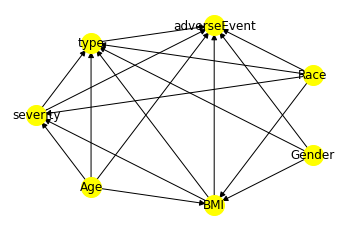

In [21]:
causal_model.view_model()

In [38]:
identified_estimand = causal_model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                           
───────(Expectation(adverseEvent|Gender,BMI,severity,Race,Age))
d[type]                                                        
Estimand assumption 1, Unconfoundedness: If U→{type} and U→adverseEvent then P(adverseEvent|type,Gender,BMI,severity,Race,Age,U) = P(adverseEvent|type,Gender,BMI,severity,Race,Age)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [43]:
causal_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression", confidence_intervals=True)
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                           
───────(Expectation(adverseEvent|Gender,BMI,severity,Race,Age))
d[type]                                                        
Estimand assumption 1, Unconfoundedness: If U→{type} and U→adverseEvent then P(adverseEvent|type,Gender,BMI,severity,Race,Age,U) = P(adverseEvent|type,Gender,BMI,severity,Race,Age)

## Realized estimand
b: adverseEvent~type+Gender+BMI+severity+Race+Age
Target units: ate

## Estimate
Mean value: 0.026022048106369086
95.0% confidence interval: [[-0.0346067   0.08665079]]

Causal Estimate is 0.026022048106369086


In [40]:
# Add Refutations

0    310
1     28
Name: adverseEvent, dtype: int64

In [ ]:
#Discuss results